In [1]:
### Diversity analysis ###
# all combined data sets

# "estimateAbundance" function infers a complete clonal abundance distribution.
# "alphaDiversity" function generate a smooth diversity (D) curve is generated over a range of diversity orders (q).
# also test the diverstiy (D) at a fixed diversity order (q).

# Load required packages
library(alakazam)
library(dplyr)
library(scales)
library(ggplot2)

require(data.table)
db <- as.data.frame(fread("../../changeo_10x/copy_a_r_vac_wt.tsv"))
glimpse(db)

Loading required package: ggplot2

As of v1.0.0 the AIRR Rearrangement schema is now the default file format.
A description of the standard is available at https://docs.airr-community.org.
The legacy Change-O format is supported through arguments to each function
that allow the input column names to be explicitly defined.


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: data.table


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last




Rows: 11,154
Columns: 60
$ sample_id                 <chr> "a", "a", "a", "a", "a", "a", "a", "a", "a"…
$ sequence_id               <chr> "TACCTATAGTATCGAA-1_contig_1", "CACCTTGGTTT…
$ sequence                  <chr> "AAACAACATATGTCCAATGTCCTCTCCTCAGACACTGAACAC…
$ rev_comp                  <chr> "F", "F", "F", "F", "F", "F", "F", "F", "F"…
$ productive                <chr> "T", "T", "T", "T", "T", "T", "T", "T", "T"…
$ v_call                    <chr> "IGHV1-22*01", "IGHV1-22*01", "IGHV1-22*01"…
$ d_call                    <chr> "IGHD3-2*02", "IGHD1-1*01,IGHD1-1*02,IGHD1-…
$ j_call                    <chr> "IGHJ3*01", "IGHJ3*01", "IGHJ3*01", "IGHJ3*…
$ sequence_alignment        <chr> "GAGGTCCAGCTGCAACAGTCTGGACCT...GAGCTGGTGAAG…
$ germline_alignment        <chr> "GAGGTCCAGCTGCAACAGTCTGGACCT...GAGCTGGTGAAG…
$ junction                  <chr> "TGTGCAAGATCAGACAGCTCAGGCTTTGCTTACTGG", "TG…
$ junction_aa               <chr> "CARSDSSGFAYW", "CARLLTSWFAYW", "CARGNYYGLA…
$ v_cigar                  

In [2]:
# Partitions the data based on the sample column
clones <- countClones(db, group=c("sample_id", "c_call"), clone="clone_id")
head(clones, 5)

sample_id,c_call,clone_id,seq_count,seq_freq
<chr>,<chr>,<chr>,<int>,<dbl>
a,IGHM,505_190,42,0.01898734
vac,IGHM,411_104,26,0.01007361
r,IGHG2C,590_58,25,0.27777778
r,IGHM,252_20,25,0.04488330
r,IGHM,651_66,8,0.01436266


In [3]:
# Partitions the data on the sample column
# Calculates a 95% confidence interval via 200 bootstrap realizations
curve <- estimateAbundance(db, group="sample_id", ci=0.95, nboot=100, clone="clone_id")

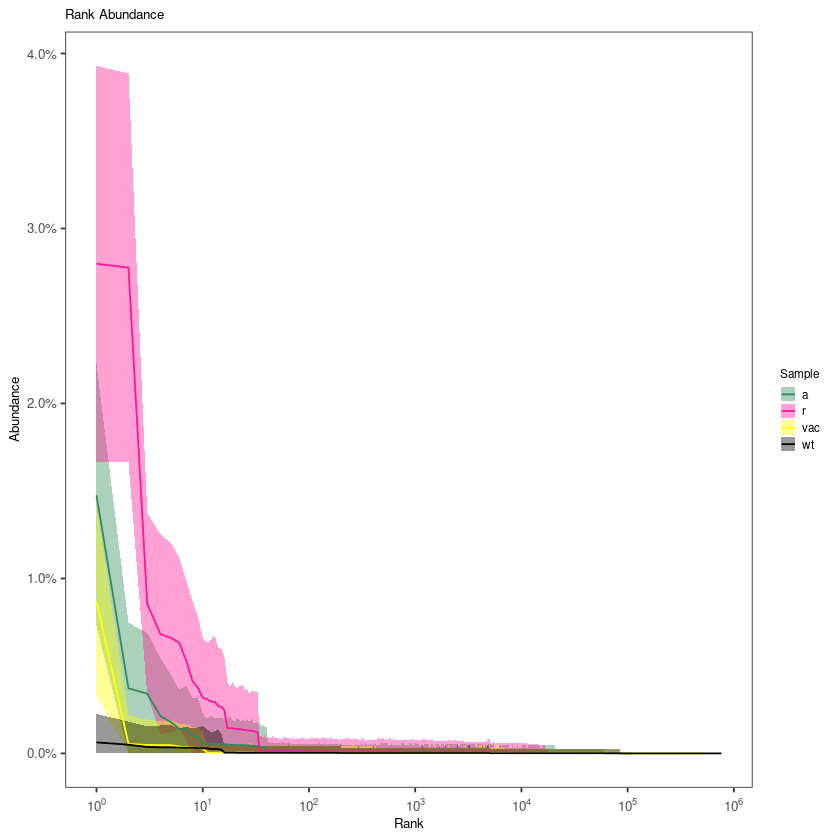

In [4]:
# Plots a rank abundance curve of the relative clonal abundances
sample_colors <- c("a"="seagreen", "r"="deeppink1", "vac"="yellow", "wt"="black")
plot(curve, colors = sample_colors, legend_title="Sample")

In [5]:
### Generating a diversity curve based on either samples or isotypes.

# 1. Using samples.
# Compare diversity curve across values in the "sample" column
# q ranges from 0 (min_q=0) to 4 (max_q=4) in 0.05 increments (step_q=0.05)
# A 95% confidence interval will be calculated (ci=0.95)
# 200 resampling realizations are performed (nboot=200)
sample_curve <- alphaDiversity(db, group="sample_id", clone="clone_id",
                               min_q=0, max_q=40, step_q=0.1,
                               ci=0.95, nboot=100)

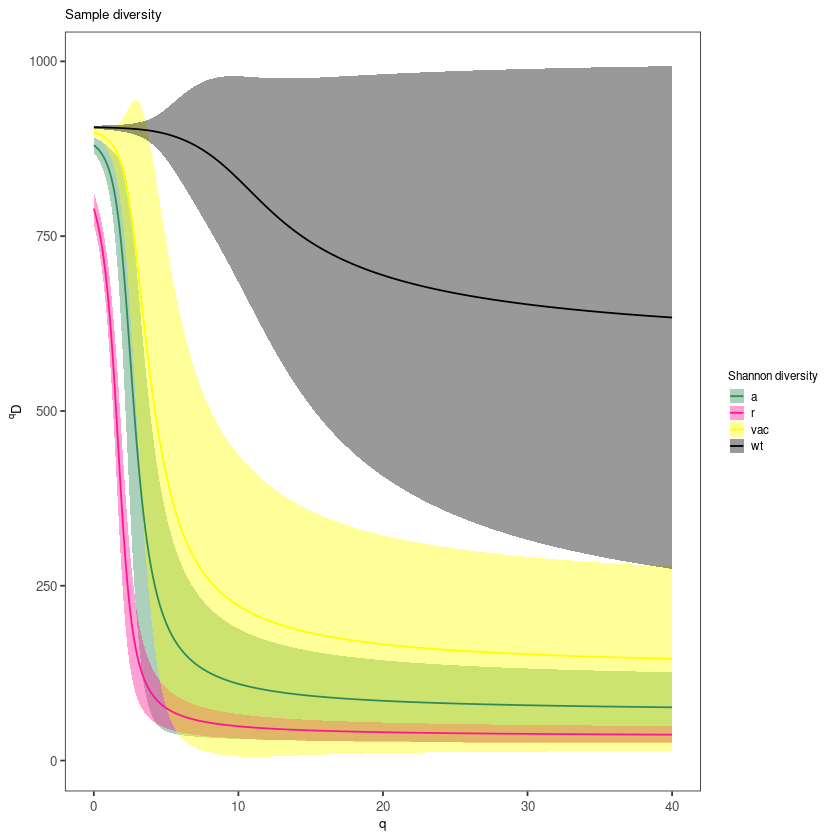

In [8]:
# Plot a log-log (log_q=TRUE, log_d=TRUE) plot of sample diversity
# Indicate number of sequences resampled from each group in the title
sample_main <- paste0("Sample diversity")
sample_colors <- c("a"="seagreen", "r"="deeppink1", "vac"="yellow", "wt"="black")
plot(sample_curve, colors=sample_colors, main_title=sample_main, 
     legend_title="Shannon diversity")

In [ ]:
# 2. Using isotypes.
# Compare diversity curve across values in the c_call column
# Analyse is restricted to c_call values with at least 30 sequences by min_n=30
# Excluded groups are indicated by a warning message
isotype_curve <- alphaDiversity(db, group="c_call", clone="clone_id",
                                min_q=0, max_q=4, step_q=0.1,
                                ci=0.95, nboot=100)

# NOT ENOUGH ISOTYPE SEQUENCES TO RUN THIS ANALYSIS...

In [ ]:
### Testing diversity

# Test diversity at q=0, q=1 and q=2 (equivalent to species richness, Shannon entropy, 
# Simpson's index) across values in the sample_id column
# 200 bootstrap realizations are performed (nboot=200)
isotype_test <- alphaDiversity(db, group="c_call", min_q=0, max_q=2, step_q=1, nboot=100, clone="clone_id")

# Print P-value table
print(isotype_test@tests)